In [1]:
import matplotlib.pyplot as plt                          
from PIL import Image
from scipy.misc import imread 
import pandas as pd 
import numpy as np 
import seaborn as sns
import jieba
import wordcloud
from pylab import mpl 
from wordcloud import WordCloud, ImageColorGenerator
mpl.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
text = open(r'/Users/xuyucan/文匯大公.txt',"r").read()

In [3]:
cut_text= jieba.cut(text,cut_all=False)
result= "/".join(cut_text)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wl/5125h54j1b5_9l3s63fcykx40000gn/T/jieba.cache
Loading model cost 0.769 seconds.
Prefix dict has been built succesfully.


In [4]:
result

'\ufeff/我们/现在/采访/了/大概/十三位/香港/各个/不同/媒体/的/负责人/，/然后/就让/他们/讲/一下/对/新/媒体/的/看法/，/无论是/宏观/的/，/还是/自己/媒体/机构/的/一些/看法/。/我/在/构思/什么/，/就是说/呢/，/虽然/我们/整体/是/拿来/做/记录/，/但是/也/可能/如果/有/一些/您/说/的/ /“/金句/”/，/我/就/摘下来/，/到/时/我们/会/穿/个/片子/，/都/是/这些/老总/们/，/星岛/的/萧世/和/啊/、/无线/的/李/宝安/啊/，/就/这些/人/，/包括/于/品海/，/我/采访/了/他/，/这样的话/就/可以/看出/各个/媒体/的/「/大佬/」/们/，/他们/在/关注/什么/问题/，/或者说/他们/在/想/什么/。/在/摘/这话/之前/我们/会先/问问/，/您/觉得/哪段/可不可以/或是/怎么样/，/好/吗/？/\n/\n/\n/这样/可以/方便/我/敞开思想/，/跟/您/交流/。/\n/\n/\n/大部分/东西/我们/都/不会/对外/公开/。/\n/\n/\n/我们/讲完/之后/，/最后/怎么/用/，/我们/可以/商量/。/\n/（/02/:/33/ /）/\n/\n/\n/Q/:/ /首先/非常感谢/李总/百忙中/抽空来/接受/我们/的/采访/。/那/第一个/问题/我/想/问/，/从/两年/前/，/大公/文汇/组成/一个/传媒/集团/，/您/在/集团/里面/担任/副董事长/，/统管/整个/集团/的/工作/。/在/过去/这/两年/，/其实/集团/成立/之后/，/在/新/媒体/的/发展/当中/，/您/作为/集团/的/主要/负责人/之一/，/做/了/哪些/事情/？/\n/\n/\n/A/:/ /谢谢/李老师/关心/我们/大公/文汇/传媒/集团/的/事业/发展/，/也/谢谢您/抽时间/来/跟/我们/做/一个/交流/。/大公/文汇/传媒/集团/，/就/像/您/刚刚/说/的/，/二零一/六年/一月/，/由/《/大公报/》/和/《/文汇报/》/来/整合/组成/一个/传媒/集团/的/时候/，/实际上/是/具有/悠久/历史/的/两个/报纸/，/这些/同仁/们/，/他们/应该/是/一个/主动/转型/，/自我/革新/的/行动/。/为什么/这么/说/呢/？/因为/这是/一个/顺应/媒体/发展/的/趋势/和/受众/需求/的

In [5]:
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords 
stopwords = stopwordslist('/Users/xuyucan/中文停用词表.txt')
#stopwords
def txt_cut(text):  
    return [w for w in jieba.cut(text) if w not in stopwords and len(w)>1]  
  
txtcut = txt_cut(text)
txtcut

['现在',
 '采访',
 '大概',
 '十三位',
 '香港',
 '不同',
 '媒体',
 '负责人',
 '就让',
 '一下',
 '媒体',
 '看法',
 '无论是',
 '宏观',
 '媒体',
 '机构',
 '看法',
 '构思',
 '整体',
 '拿来',
 '记录',
 '可能',
 '金句',
 '摘下来',
 '片子',
 '老总',
 '星岛',
 '萧世',
 '无线',
 '宝安',
 '包括',
 '品海',
 '采访',
 '这样的话',
 '看出',
 '媒体',
 '大佬',
 '关注',
 '问题',
 '或者说',
 '这话',
 '之前',
 '会先',
 '问问',
 '觉得',
 '哪段',
 '可不可以',
 '方便',
 '敞开思想',
 '交流',
 '大部分',
 '东西',
 '不会',
 '对外',
 '公开',
 '讲完',
 '之后',
 '最后',
 '商量',
 '02',
 '33',
 '非常感谢',
 '李总',
 '百忙中',
 '抽空来',
 '接受',
 '采访',
 '第一个',
 '问题',
 '两年',
 '大公',
 '文汇',
 '组成',
 '一个',
 '传媒',
 '集团',
 '集团',
 '里面',
 '担任',
 '副董事长',
 '统管',
 '整个',
 '集团',
 '工作',
 '过去',
 '两年',
 '其实',
 '集团',
 '成立',
 '之后',
 '媒体',
 '发展',
 '当中',
 '集团',
 '主要',
 '负责人',
 '事情',
 '谢谢',
 '李老师',
 '关心',
 '大公',
 '文汇',
 '传媒',
 '集团',
 '事业',
 '发展',
 '谢谢您',
 '抽时间',
 '一个',
 '交流',
 '大公',
 '文汇',
 '传媒',
 '集团',
 '刚刚',
 '二零一',
 '六年',
 '一月',
 '大公报',
 '文汇报',
 '整合',
 '组成',
 '一个',
 '传媒',
 '集团',
 '实际上',
 '具有',
 '悠久',
 '历史',
 '两个',
 '报纸',
 '同仁',
 '应该',
 '一个',
 '主动',
 '转型',
 '自我',
 '革新',
 '行动',


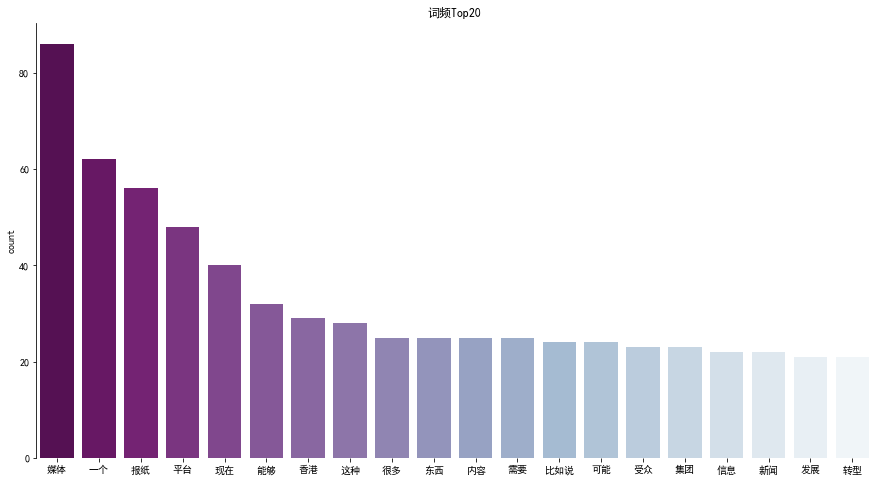

In [6]:
word_count = pd.Series(txtcut).value_counts().sort_values(ascending=False)[0:20]  
fig = plt.figure(figsize=(15,8))  
x = word_count.index.tolist()  
y = word_count.values.tolist()  
sns.barplot(x, y, palette="BuPu_r")  
plt.title('词频Top20')  
plt.ylabel('count')  
sns.despine(bottom=True)  
plt.savefig('/Users/xuyucan/词频统计.png',dpi=400)  
plt.show() 

In [7]:
image = Image.open(r'/Users/xuyucan/newspaper.png')
graph = np.array(image)

In [8]:
wc = WordCloud(font_path=r"/Users/xuyucan/STHeiti Light.ttc",mode='RGBA',background_color=None,max_font_size=300,mask=graph)
wc.generate(' '.join(txtcut))

In [9]:
img = imread('/Users/xuyucan/color.png')  
cloud_colors = wordcloud.ImageColorGenerator(np.array(img))  
wc.recolor(color_func=cloud_colors)  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


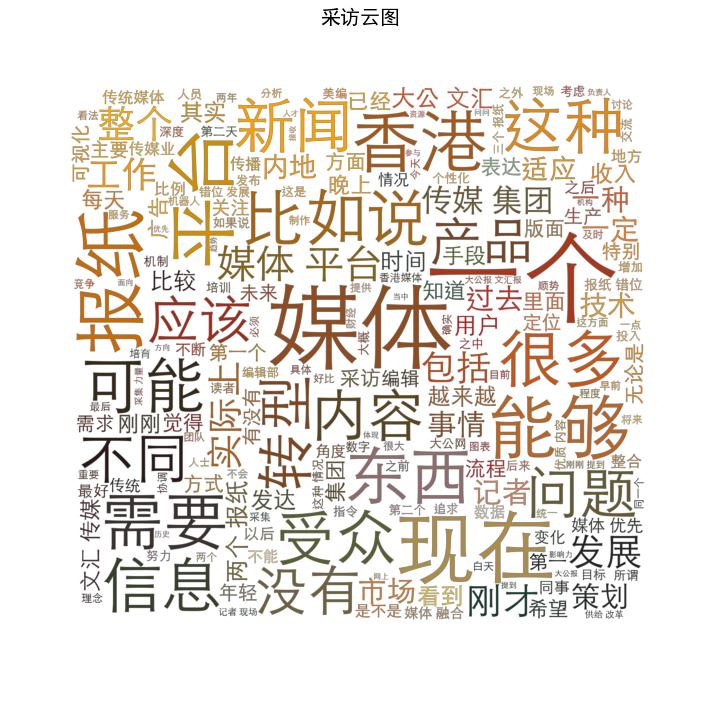

In [10]:
wc.to_file(r"/Users/xuyucan/wordcloud.png") 
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title('采访云图', loc='Center', fontsize=20)
plt.show()